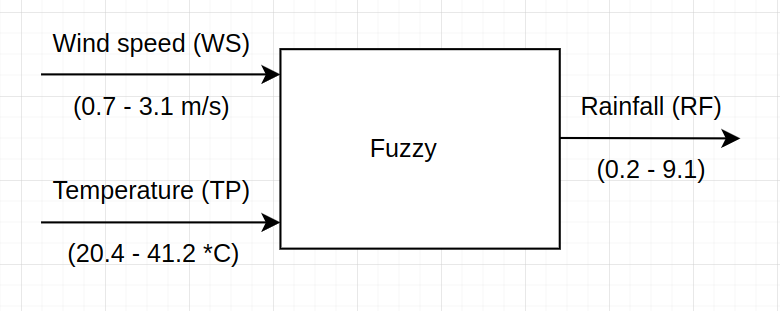

In [23]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl

import warnings
warnings.filterwarnings("ignore")

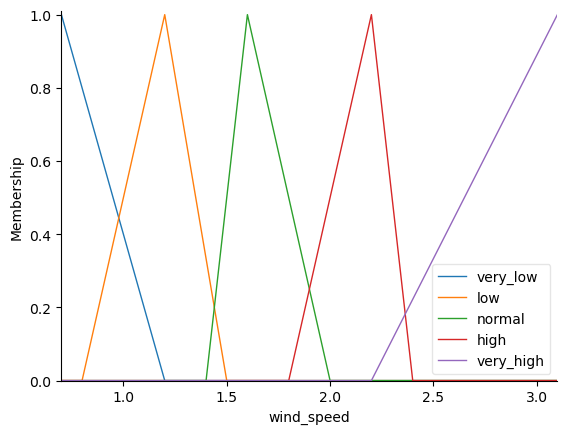

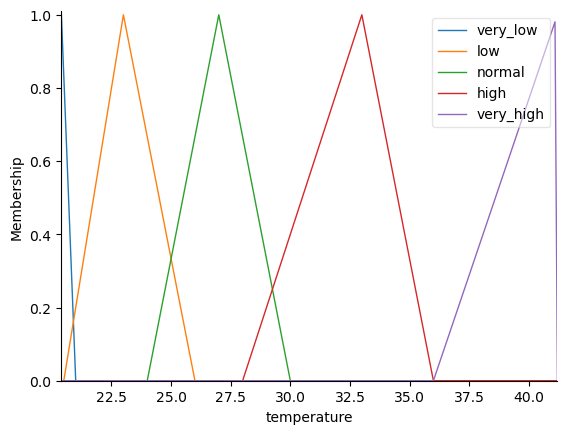

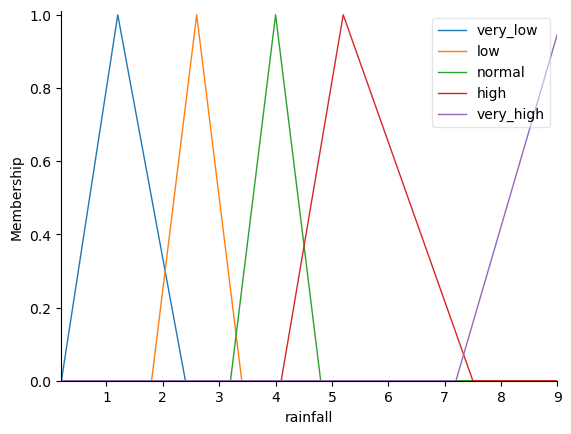

In [29]:
WS = ctrl.Antecedent(np.arange(0.7, 3.1, 0.1), 'wind_speed')
TP = ctrl.Antecedent(np.arange(20.4, 41.2, 0.1), 'temperature')
RF = ctrl.Consequent(np.arange(0.2, 9.1, 0.1), 'rainfall')


WS['very_low'] = fuzz.trimf(WS.universe, [0.7,0.7,1.2])
WS['low'] = fuzz.trimf(WS.universe, [0.8,1.2,1.5])
WS['normal'] = fuzz.trimf(WS.universe, [1.4,1.6,2])
WS['high'] = fuzz.trimf(WS.universe, [1.8,2.2,2.4])
WS['very_high'] = fuzz.trimf(WS.universe, [2.2,3.1,3.1])

TP['very_low'] = fuzz.trimf(TP.universe, [20.4,20.4,21])
TP['low'] = fuzz.trimf(TP.universe, [20.5,23,26])
TP['normal'] = fuzz.trimf(TP.universe, [24,27,30])
TP['high'] = fuzz.trimf(TP.universe, [28,33,36])
TP['very_high'] = fuzz.trimf(TP.universe, [36,41.2,41.2])

RF['very_low'] = fuzz.trimf(RF.universe, [0.2,1.2,2.4])
RF['low'] = fuzz.trimf(RF.universe, [1.8,2.6,3.4])
RF['normal'] = fuzz.trimf(RF.universe, [3.2,4,4.8])
RF['high'] = fuzz.trimf(RF.universe, [4.1, 5.2,7.5])
RF['very_high'] =  fuzz.trimf(RF.universe, [7.2,9.1,9.1])



WS.view()
TP.view()
RF.view()

# Rules

| WS\\TP | VL  | L   | N   | H   | VH  |
| :----- | :-- | :-- | :-- | :-- | :-- |
| VL     | VL  | L   | L   | N   | N   |
| L      | L   | L   | N   | N   | N   |
| N      | L   | N   | N   | H   | H   |
| H      | N   | N   | H   | H   | H   |
| VH     | H   | N   | H   | H   | VH  |

In [30]:
rule1 = ctrl.Rule(WS['very_low'] & TP['very_low'], RF['very_low'])
rule2 = ctrl.Rule(WS['low'] & TP['very_low'], RF['low'])
rule3 = ctrl.Rule(WS['normal'] & TP['very_low'], RF['low'])
rule4 = ctrl.Rule(WS['high'] & TP['very_low'], RF['normal'])
rule5 = ctrl.Rule(WS['very_high'] & TP['very_low'], RF['high'])
                                                    
                                                    
rule6 = ctrl.Rule(WS['very_low'] & TP['low'], RF['low'])
rule7 = ctrl.Rule(WS['low'] & TP['low'], RF['low'])
rule8 = ctrl.Rule(WS['normal'] & TP['low'], RF['normal'])
rule9 = ctrl.Rule(WS['high'] & TP['low'], RF['normal'])
rule10 = ctrl.Rule(WS['very_high'] & TP['low'], RF['normal'])


rule11 = ctrl.Rule(WS['very_low'] & TP['normal'], RF['low'])
rule12 = ctrl.Rule(WS['low'] & TP['normal'], RF['normal'])
rule13 = ctrl.Rule(WS['normal'] & TP['normal'], RF['normal'])
rule14 = ctrl.Rule(WS['high'] & TP['normal'], RF['high'])
rule15 = ctrl.Rule(WS['very_high'] & TP['normal'], RF['high'])
                                                    
                                                    
rule16 = ctrl.Rule(WS['very_low'] & TP['high'], RF['normal'])
rule17 = ctrl.Rule(WS['low'] & TP['high'], RF['normal'])
rule18 = ctrl.Rule(WS['normal'] & TP['high'], RF['high'])
rule19 = ctrl.Rule(WS['high'] & TP['high'], RF['high'])
rule20 = ctrl.Rule(WS['very_high'] & TP['high'], RF['high'])
                                                    
                                                    
rule21 = ctrl.Rule(WS['very_low'] & TP['very_high'], RF['normal'])
rule22 = ctrl.Rule(WS['low'] & TP['very_high'], RF['normal'])
rule23 = ctrl.Rule(WS['normal'] & TP['very_high'], RF['high'])
rule24 = ctrl.Rule(WS['high'] & TP['very_high'], RF['high'])
rule25 = ctrl.Rule(WS['very_high'] & TP['very_high'], RF['very_high'])

5.690000000000002


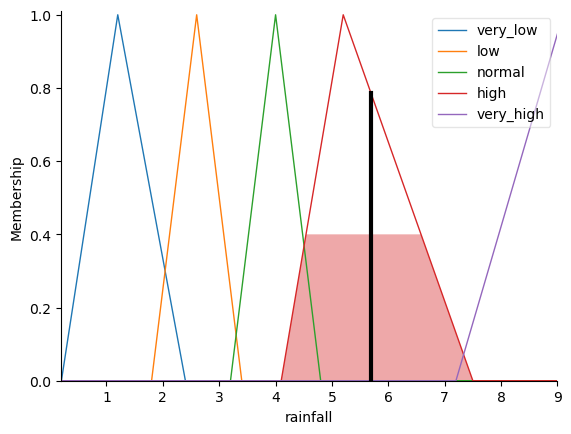

In [36]:
conclusion_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12,rule13, 
                                 rule14, rule15, rule16, rule17, rule18, rule19, rule20])
conclusing = ctrl.ControlSystemSimulation(conclusion_ctrl)

conclusing.input['wind_speed'] = 3
conclusing.input['temperature'] = 30
conclusing.compute()

print(conclusing.output['rainfall'])
RF.view(sim=conclusing)